In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Câu 1: Tạo DataFrame từ dữ liệu trên

In [3]:
data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivan', 'Jack', 'Kelly', 'Liam', 'Mona', 'Nina', 'Oscar'],
    'Age': ['25', '30', '35', '28', '22', '45', '34', '31', '27', '29', '33', '40', '26', '32', '36'],
    'Salary': ['50000', '60000', '70000', '55000', '52000', '80000', '72000', '68000', '61000', '59000', '63000', '77000', '53000', '66000', '75000']
    })

Câu 2: Hiển thị thông tin về DataFrame vừa tạo

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    15 non-null     object
 1   Age     15 non-null     object
 2   Salary  15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


Câu 3: Lọc các hàng trong DataFrame có 'Age' lớn hơn 28

In [5]:
data_filtered = data[(data['Age'].astype(int)) > 28]
data_filtered

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
5,Frank,45,80000
6,Grace,34,72000
7,Hannah,31,68000
9,Jack,29,59000
10,Kelly,33,63000
11,Liam,40,77000
13,Nina,32,66000
14,Oscar,36,75000


Câu 4: Tính giá trị trung bình của cột 'Salary'

In [6]:
cau_4 = data['Salary'].mean()
cau_4

3.333373333800004e+73

Câu 5: Nhóm dữ liệu theo cột 'Age' và tính tổng 'Salary' cho mỗi nhóm

In [7]:
cau_5 = data.groupby('Age')['Salary'].sum()
cau_5.head()

Age
22    52000
25    50000
26    53000
27    61000
28    55000
Name: Salary, dtype: object

Câu 6: Sắp xếp DataFrame theo cột 'Salary' giảm dần 

In [8]:
cau_6 = data['Salary'].sort_values()
cau_6.head(10)

0     50000
4     52000
12    53000
3     55000
9     59000
1     60000
8     61000
10    63000
13    66000
7     68000
Name: Salary, dtype: object

Câu 7: Vẽ biểu đồ cho cột 'Age'

<AxesSubplot:xlabel='Age'>

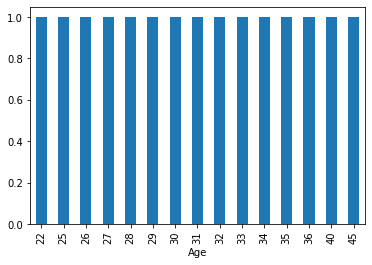

In [9]:
cau_7 = data.groupby('Age')['Age'].agg('count')
cau_7.plot.bar()

Câu 8: Vẽ biểu đồ đường cột cho 'Salary'

<AxesSubplot:xlabel='Salary'>

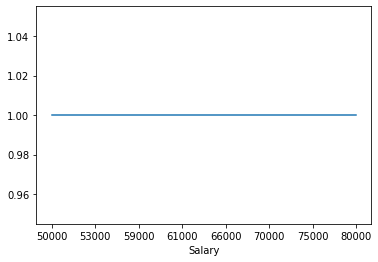

In [10]:
cau_8= data.groupby('Salary')['Salary'].agg('count')
cau_8.plot.line()

Câu 9: Vẽ biểu đồ tròn cho cột 'Age'

<AxesSubplot:ylabel='Age'>

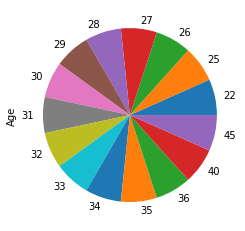

In [11]:
cau_9 = data.groupby('Age')['Age'].agg('count')
cau_9.plot.pie()

Câu 10: Vẽ biểu đồ phân tán cho 'Age' và 'Salary'

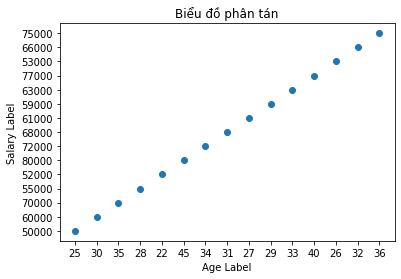

In [12]:
plt.scatter(data['Age'].values, data['Salary'].values)
plt.xlabel('Age Label')
plt.ylabel('Salary Label')
plt.title('Biểu đồ phân tán')
plt.show()

Câu 11: Kiểm tra xem có giá trị NaN trong DataFrame không

In [13]:
if data.empty:
    print("DataFrame is empty.")
else:
    print("DataFrame is not empty.")

if data.isna().sum().sum() == 0:
    print("No NaN values in the DataFrame.")
else:
    print("There are NaN values in the DataFrame.")
    
if not data.empty and data.isna().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isna(), yticklabels=False, cbar=True, cmap='viridis')
else:
    print("No data to plot or no NaN values in the DataFrame.")

DataFrame is not empty.
No NaN values in the DataFrame.
No data to plot or no NaN values in the DataFrame.


Câu 12: Thay thế các giá trị của cột 'Age' lớn hơn 30 bằng giá trị trung bình của cột đó

In [14]:
age = data['Age'].values
mean = int(data['Age'].astype(int).mean())
value = []
for val in age:
    if int(val) > 30: 
        value.append(mean)
    else:
        value.append(int(val))

data['Age'] = value
data


,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,31,70000
3,David,28,55000
4,Eva,22,52000
5,Frank,31,80000
6,Grace,31,72000
7,Hannah,31,68000
8,Ivan,27,61000
9,Jack,29,59000


Câu 13: Chuẩn hóa cột 'Age' về khoảng giá trị từ 0 đến 1

Câu 14: Tạo 1 cột mới 'Age_group' phân loại tuổi thành 'Young', 'Middle-aged', 'Old'dựa trên giá trị của cột 'Age'

Câu 15: Tính toán tỷ lệ phần trăm thay đổi của cột 'Salary'

In [15]:
salary_percent = data['Salary'].astype(int).pct_change()
salary_percent

0          NaN
1     0.200000
2     0.166667
3    -0.214286
4    -0.054545
5     0.538462
6    -0.100000
7    -0.055556
8    -0.102941
9    -0.032787
10    0.067797
11    0.222222
12   -0.311688
13    0.245283
14    0.136364
Name: Salary, dtype: float64

Câu 16: Tím các giá trị trùng lặp trong DataFrame dựa trên cột 'Name' và loại bỏ các hàng trùng lặp, giữ lại hàng đầu tiên

In [16]:
cau_16 = data.drop_duplicates(keep=0, subset=['Name'])
cau_16

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,31,70000
3,David,28,55000
4,Eva,22,52000
5,Frank,31,80000
6,Grace,31,72000
7,Hannah,31,68000
8,Ivan,27,61000
9,Jack,29,59000


Câu 17: Lưu kết quả thành file csv


In [17]:
data.to_csv("baikiemtraso1")